In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

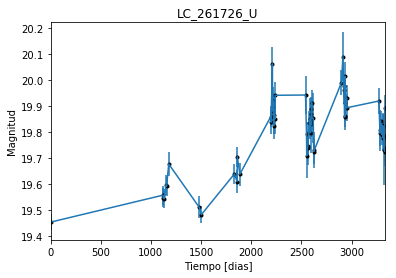

In [2]:
data = np.genfromtxt('LC_261726_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_261726_U')
plt.savefig("LC_261726_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

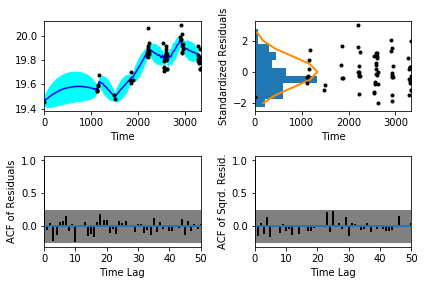

In [5]:
sample.assess_fit()

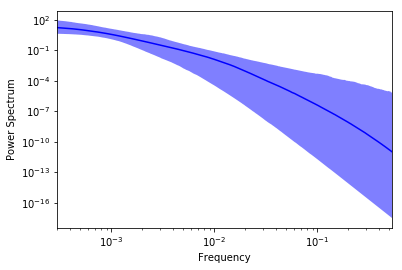

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

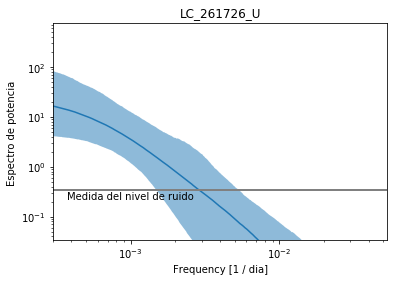

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_261726_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_261726_U')

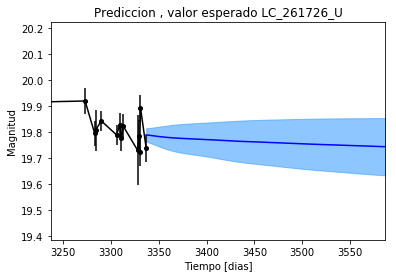

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_261726_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_261726_U')

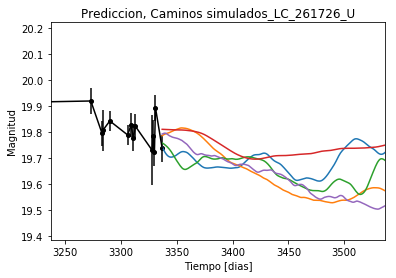

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_261726_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


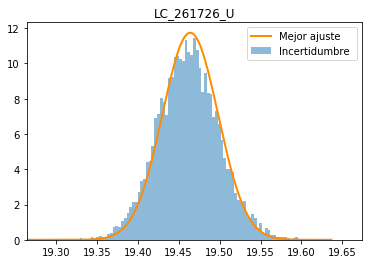

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_261726_U')
plt.savefig("Mejor_ajuste_LC_261726_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_261726_U')

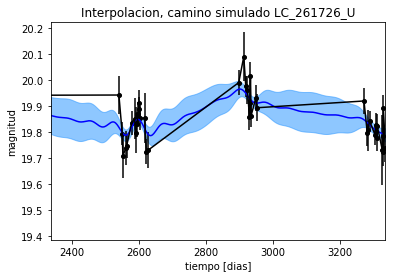

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_U')

Text(0.5,1,'Interpolacion, camino simulado LC_261726_U')

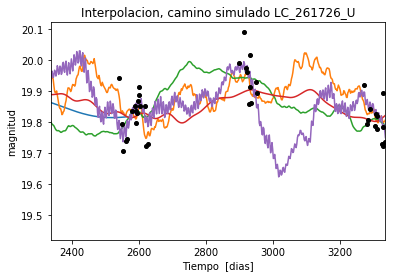

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 593.605065234
Median: 0.0161516704656
Standard deviation: 0.19586093226
68% credibility interval: [ 0.00133393  0.21713559]
95% credibility interval: [  4.11954652e-04   7.59179774e-01]
99% credibility interval: [  3.21200433e-04   9.66617909e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 429.806136252
Median: 0.00263527029881
Standard deviation: 0.0827458929947
68% credibility interval: [ 0.00044975  0.03137613]
95% credibility interval: [ 0.00032236  0.22313542]
99% credibility interval: [  3.03880459e-04   6.61095203e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 643.734487589
Median: 0.0259728309251
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2247.57086954
Median: 105.317998489
Standard deviation: 1.60340594057
68% credibility interval: [ 103.6048729   106.57702196]
95% credibility interval: [ 101.21509469  107.46664619]
99% credibility interval: [  99.15183728  107.7719232 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 375.904468084
Median: 0.829508118395
Standard deviation: 2.23212209372
68% credibility interval: [ 0.07936043  3.97538563]
95% credibility interval: [ 0.01829512  7.7480405 ]
99% credibility interval: [  0.01115534  10.41467635]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 430.74657132
Median: 0.864374154428
Standard deviation: 9.84914747685
68% credibility interval: [  0.03671013  11.61858323]
95% credibility interval: [  2.50106226

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19632.9476312
Median: 1.12194890767e-47
Standard deviation: 54722.7143979
68% credibility interval: [  2.18064951e-87   8.42252997e-10]
95% credibility interval: [  2.33060433e-150   5.68940506e+000]
99% credibility interval: [  3.90338593e-185   9.98448141e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2999.65498147
Median: 19.6793593199
Standard deviation: 0.0993060652387
68% credibility interval: [ 19.58635242  19.76079901]
95% credibility interval: [ 19.44936079  19.85702148]
99% credibility interval: [ 19.32320739  19.94198577]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 637.761332423
Median: 0.0161277702568
Standard deviation: 0.270567012206
68% credibility interval: [ 0.          0.43740043]
95% credibility interval: [ 0.          0.95814553]
99% credibility interval: [ 0.          1.03874757]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 637.761332423
Median: 0.0161277702568
Standard deviation: 0.270567012206
68% credibility interval: [ 0.          0.43740043]
95% credibility interval: [ 0.          0.95814553]
99% credibility interval: [ 0.          1.03874757]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1305.92736948
Median: 0.0
Standard deviation: 0.000370194262624
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2247.57086954
Median: 105.317998489
Standard deviation: 1.60340594057
68% credibility interval: [ 103.6048729   106.57702196]
95% credibility interval: [ 101.21509469  107.46664619]
99% credibility interval: [  99.15183728  107.7719232 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2526.36417527
Median: 0.0324871916083
Standard deviation: 0.035796508039
68% credibility interval: [ 0.01994025  0.06165207]
95% credibility interval: [ 0.01313792  0.12941599]
99% credibility interval: [ 0.01039188  0.23009457]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1793.4972566
Median: 1.06112741519
Standard deviation: 0.170846737651
68% credibility interval: [ 0.90276865  1.24296806]
95% credibility interval: [ 0.77955663  1.44180882]
99% credibility interval: [ 0.71080768  1.60203855]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1220.22545182
Median: 0.000392595909408
Standard deviation: 0.135559250171
68% credibility interval: [  7.16613948e-06   1.40470741e-02]
95% credibility interval: [  2.06886482e-07   2.54536276e-01]
99% credibility interval: [  2.23487806e-08   7.28715557e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 593.605065234
Median: (-0.101483938556+0j)
Standard deviation: 2.0986968823
68% credibility interval: [-1.36430317-2.85738621j -0.00838131-1.15370021j]
95% credibility interval: [ -4.77006720e+00+0.j        -2.58838742e-03-0.018756j]
99% credibility interval: [ -6.07343945e+00+0.j          -2.01816184e-03-0.61919313j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 429.806136252
Median: (-0.016557891622+0.102825914607j)
Standard deviation: 1.77774610017
68% credibility interval: [-0.19714203+3.59301885j -0.00282584+0.j        ]
95% credibility interval: [-1.40200119+2.310971j -0.00202544+0.j      ]
99% credibility interval: [ -4.15378367e+00+4.84497433j  -1.90933723e-03+0.j        ]
Posterior summary for parameter ar_r